In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading dataset
df = pd.read_csv("/content/drive/MyDrive/ML_Classification_Model/Campus_Placements/Placement_Data_Full_Class.csv")

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
#shape of dataset
df.shape

(215, 15)

In [ ]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
#statistical summary of dataset
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
#Check missing values in dataset
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
#Here salary columns have missing values in dataset

In [ ]:
#Check duplicated values in dataset
df.duplicated().sum()

0

In [ ]:
#columns of dataset
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
for cols in df.columns:
  print(df[cols].value_counts())

1      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
215    1
Name: sl_no, Length: 215, dtype: int64
M    139
F     76
Name: gender, dtype: int64
62.00    11
63.00    10
67.00     9
52.00     9
73.00     9
         ..
69.70     1
80.92     1
83.00     1
86.50     1
80.60     1
Name: ssc_p, Length: 103, dtype: int64
Central    116
Others      99
Name: ssc_b, dtype: int64
63.00    14
62.00    12
67.00     9
60.00     9
64.00     8
         ..
83.83     1
70.40     1
90.90     1
89.83     1
42.00     1
Name: hsc_p, Length: 97, dtype: int64
Others     131
Central     84
Name: hsc_b, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
65.0    20
66.0    13
72.0    12
64.0    11
58.0     9
        ..
82.0     1
50.8     1
76.0     1
63.0     1
77.6     1
Name: degree_p, Length: 89, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
No     141
Yes     74
Name: workex, dtype: int64

In [ ]:
df['status'].value_counts(normalize = True)

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

In [ ]:
#we can say that dataset is balanced.

### EDA

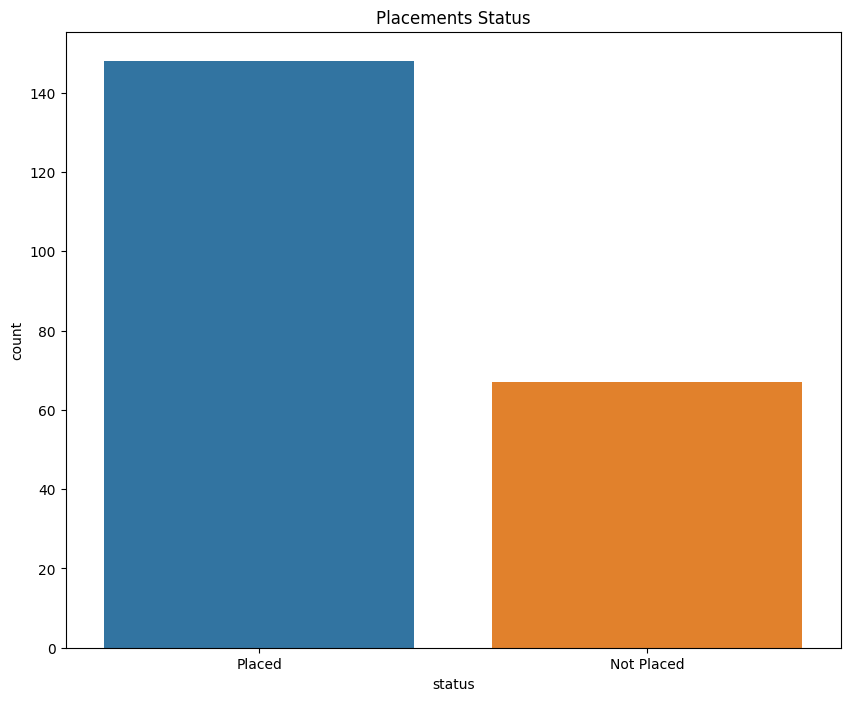

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'status', data = df)
plt.title("Placements Status")
plt.show()

### Observations:- 
 - From the above plot we can see that more number students get placements.

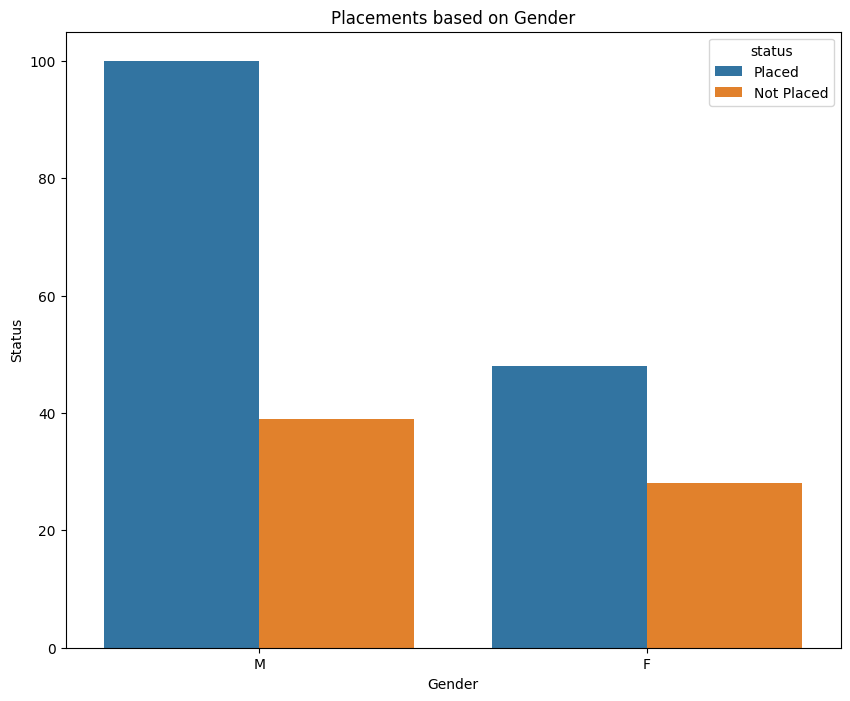

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'gender', hue = 'status', data = df)
plt.title("Placements based on Gender", fontsize = 12)
plt.xlabel("Gender", fontsize = 10)
plt.ylabel("Status", fontsize = 10)
plt.show()

### Observations:- 
 - From the above plot we can say that approximately 100 male and 48 female students got the placements.

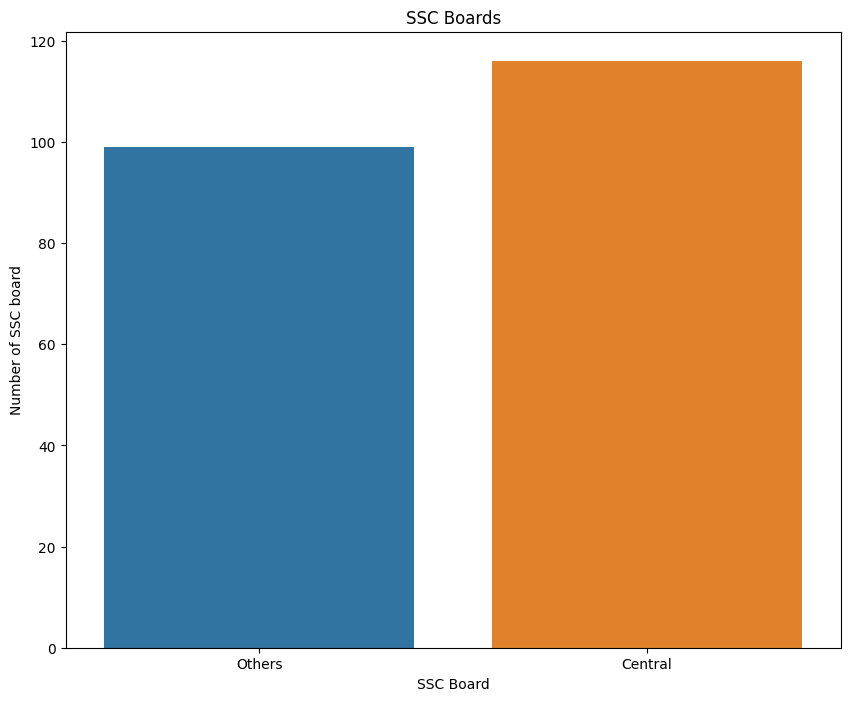

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'ssc_b', data = df)
plt.title("SSC Boards", fontsize = 12)
plt.xlabel("SSC Board", fontsize = 10)
plt.ylabel("Number of SSC board", fontsize = 10)
plt.show()

### Observations:- 
 - We can see that out of 215 students, there are approximately 99 students from Others ssc board and 116 students from Central ssc boards.

In [ ]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

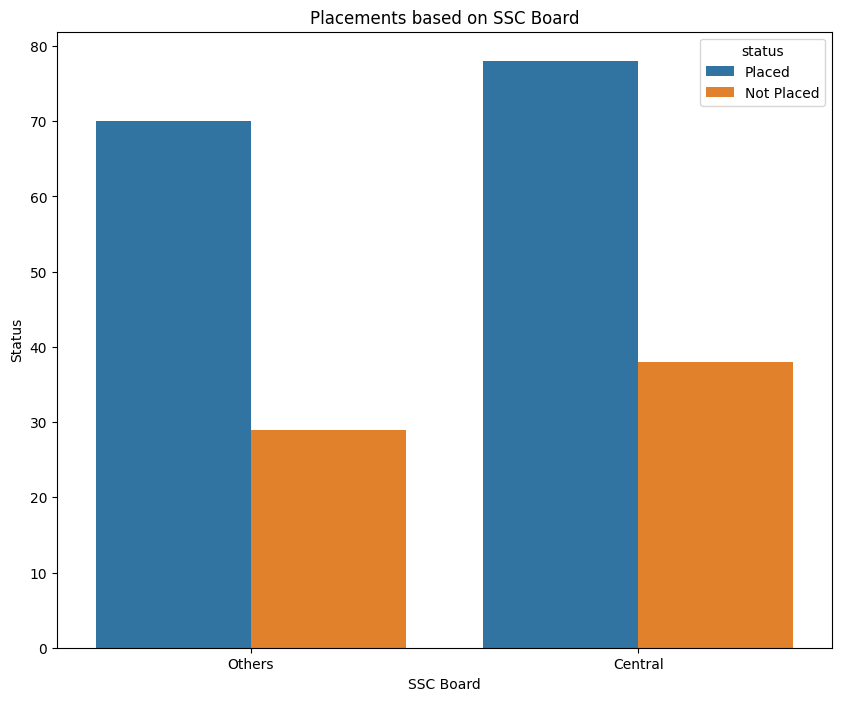

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'ssc_b', hue = 'status', data = df)
plt.title("Placements based on SSC Board", fontsize = 12)
plt.xlabel("SSC Board", fontsize = 10)
plt.ylabel("Status", fontsize = 10)
plt.show()

### Observations:-
 - The count of central board students is more than the others board students.
 - The count of placements for central board students is little more than others board students

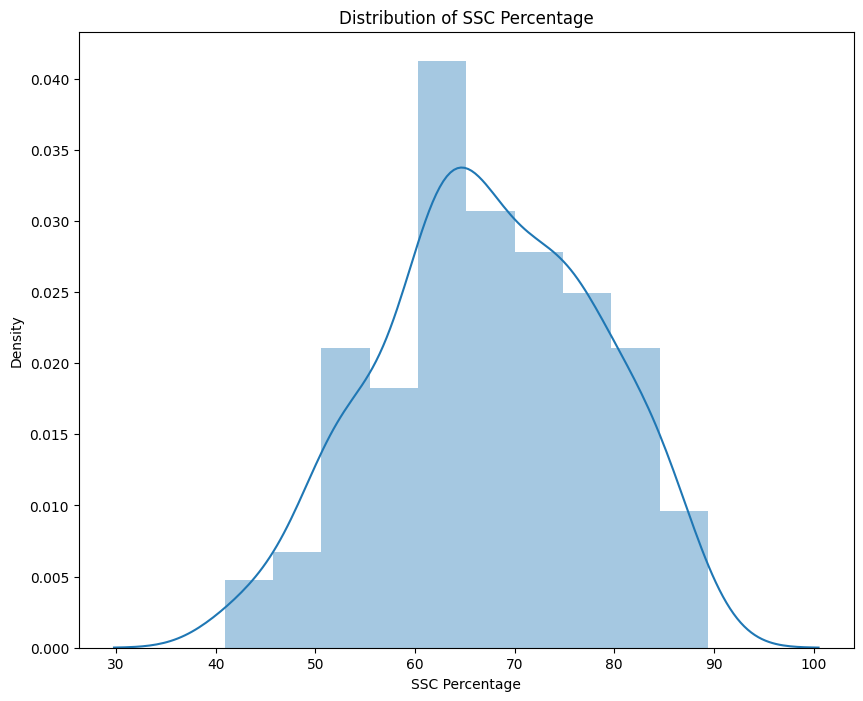

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df['ssc_p'])
plt.xlabel("SSC Percentage")
plt.title("Distribution of SSC Percentage", fontsize = 12)
plt.show()

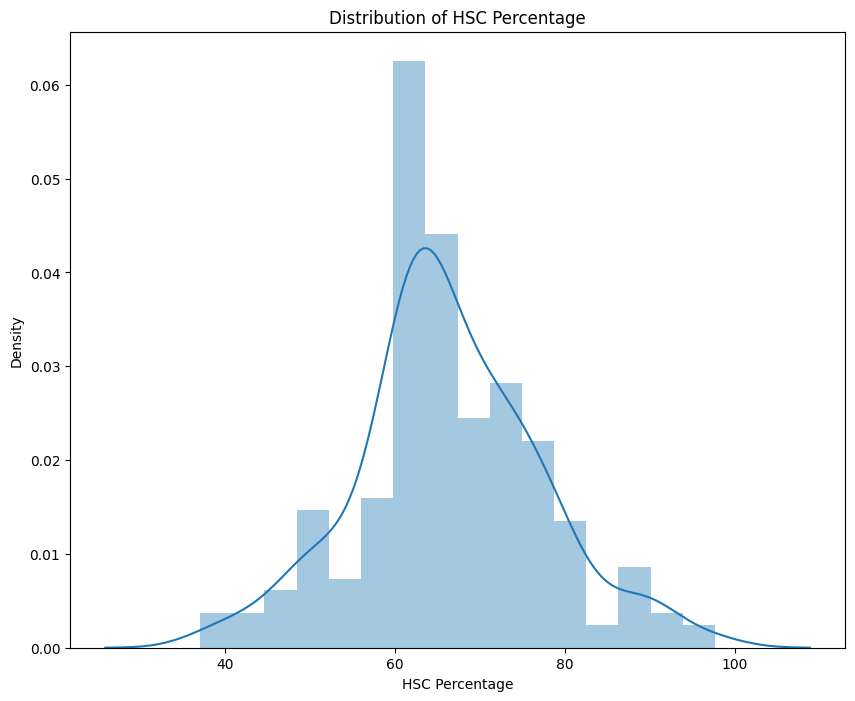

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df['hsc_p'])
plt.xlabel("HSC Percentage")
plt.title("Distribution of HSC Percentage", fontsize = 12)
plt.show()

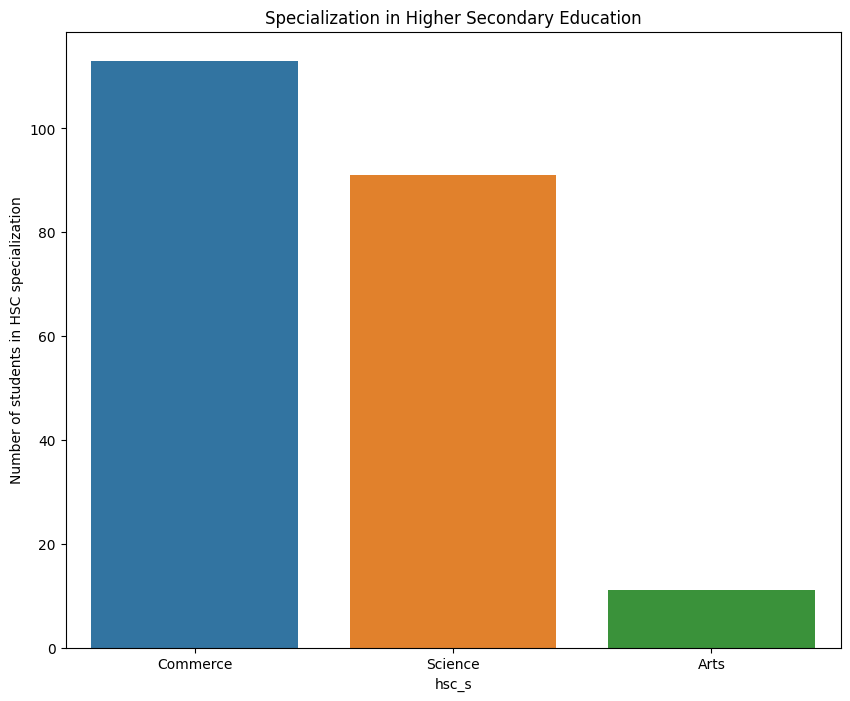

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x= 'hsc_s', data = df)
plt.title("Specialization in Higher Secondary Education", fontsize = 12)
plt.xlabel("hsc_s", fontsize = 10)
plt.ylabel("Number of students in HSC specialization", fontsize = 10)
plt.show()

### Observations:- 
 - From the above plot we can say that there are more numbers of students from Commerce field then Science field and less number of students from Arts field.

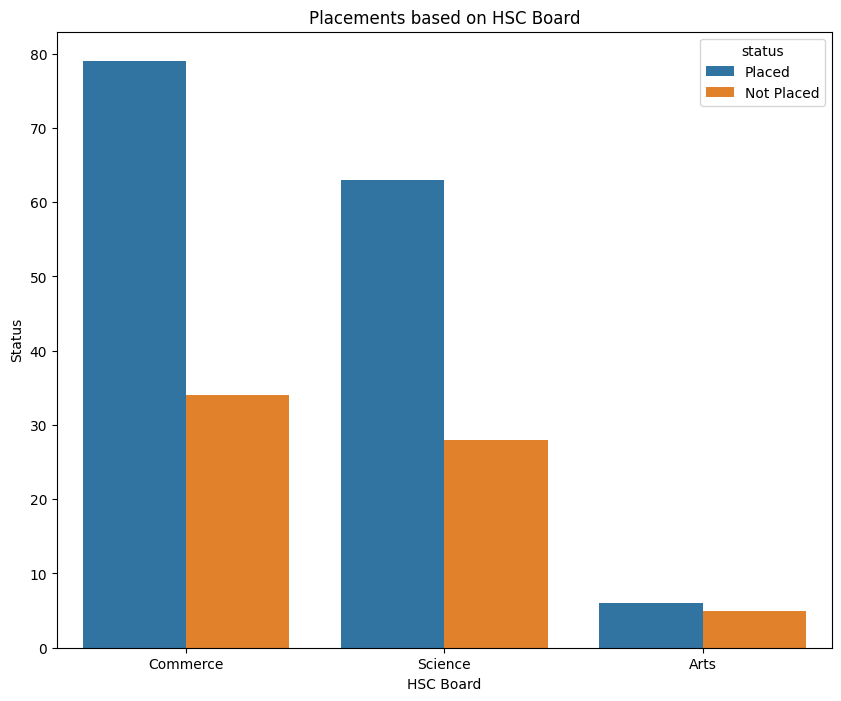

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'hsc_s', hue = 'status', data = df)
plt.title("Placements based on HSC Board", fontsize = 12)
plt.xlabel("HSC Board", fontsize = 10)
plt.ylabel("Status", fontsize = 10)
plt.show()

### Obsevations:- 
 - The count of placements from the commerce branch students is more then second count will be science branch students. 
 - But the count of placements from the arts branch students is less.

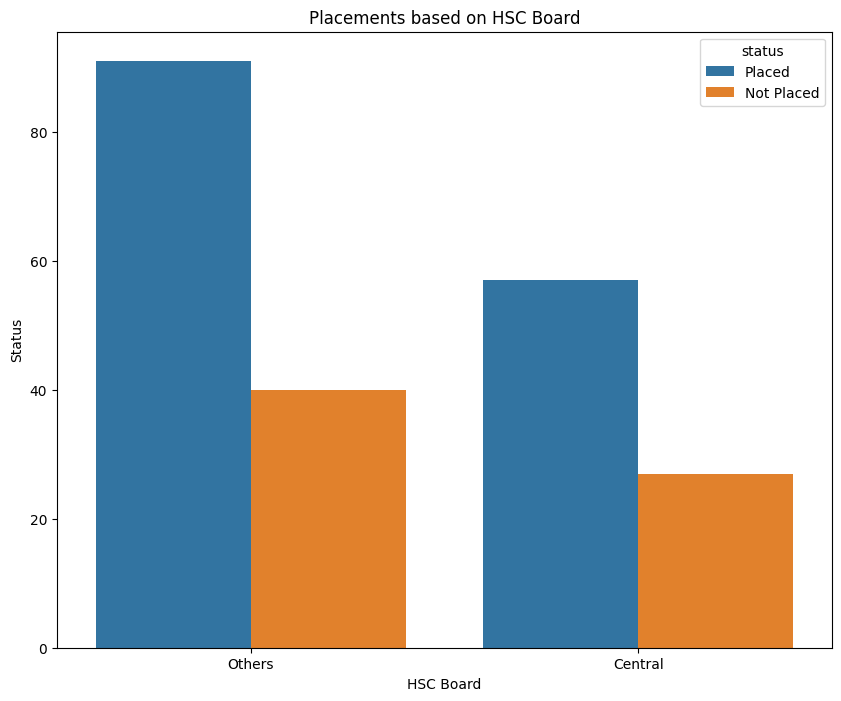

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'hsc_b', hue = 'status', data = df)
plt.title("Placements based on HSC Board", fontsize = 12)
plt.xlabel("HSC Board", fontsize = 10)
plt.ylabel("Status", fontsize = 10)
plt.show()

### Observations:-
 - The count of placements for others hsc board students is more than the central hsc board students

In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

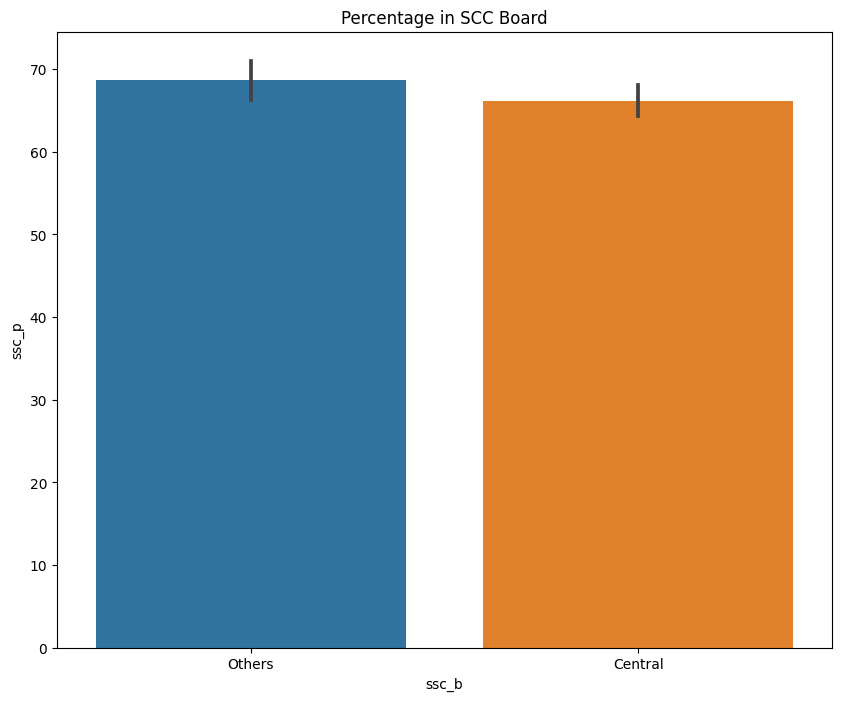

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'ssc_b', y = 'ssc_p', data = df)
plt.title("Percentage in SCC Board")
plt.show()

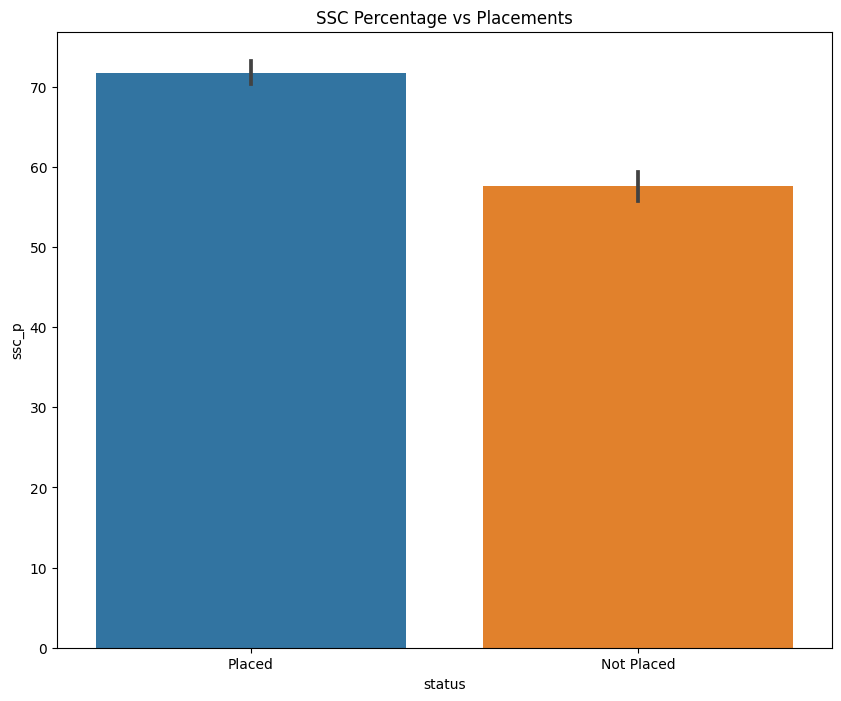

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'status', y = 'ssc_p', data = df)
plt.title("SSC Percentage vs Placements")
plt.show()

### Observations:- 
 - The percentage in SSC board has clearly on impact on placements.
 Stduents with good percentage have a very good chance of getting placements.

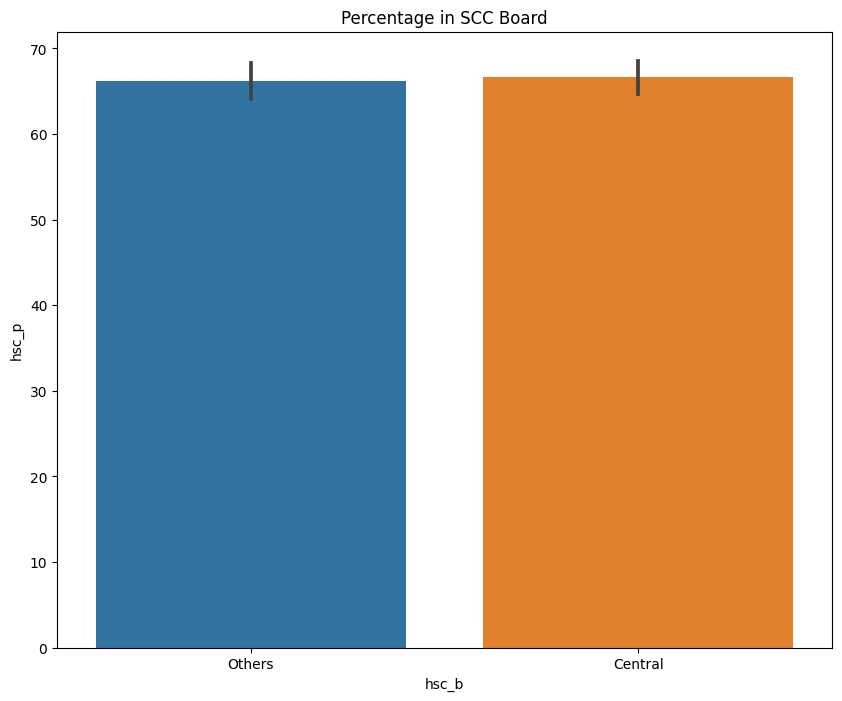

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'hsc_b', y = 'hsc_p', data = df)
plt.title("Percentage in SCC Board")
plt.show()

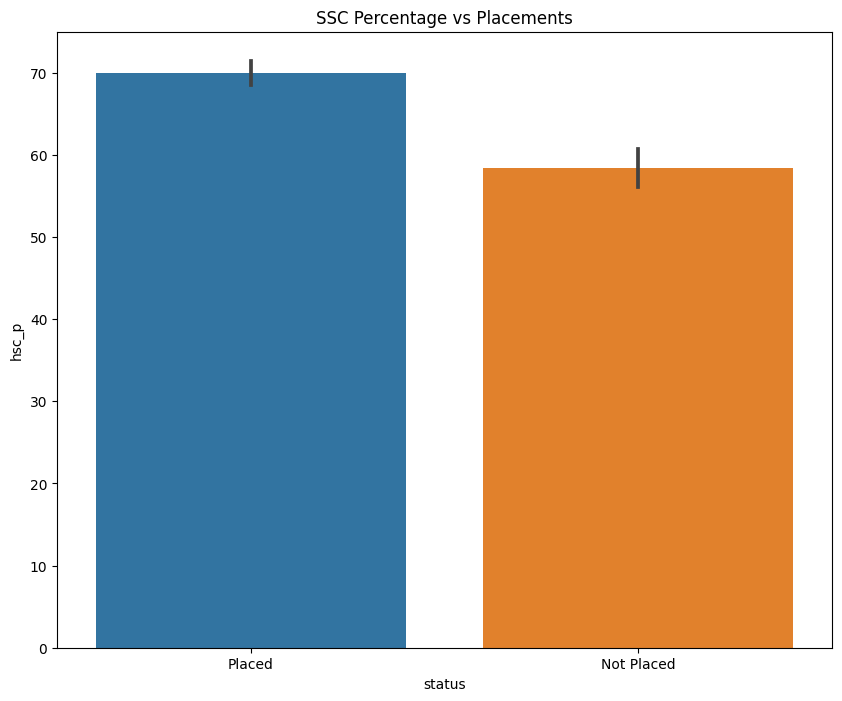

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'status', y = 'hsc_p', data = df)
plt.title("SSC Percentage vs Placements")
plt.show()

### Obervations:- 
 - The percentage in HSC board has clearly on impact on placements. Stduents with good percentage have a very good chance of getting placements

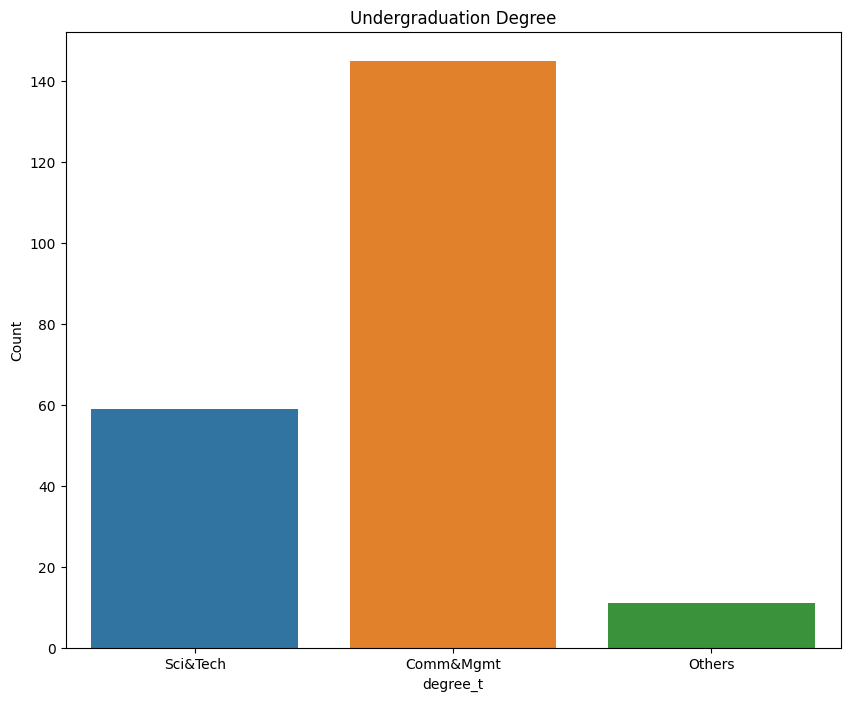

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'degree_t', data = df)
plt.title("Undergraduation Degree", fontsize = 12)
plt.xlabel("degree_t", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

 - The count of students from commerce and management degree is more

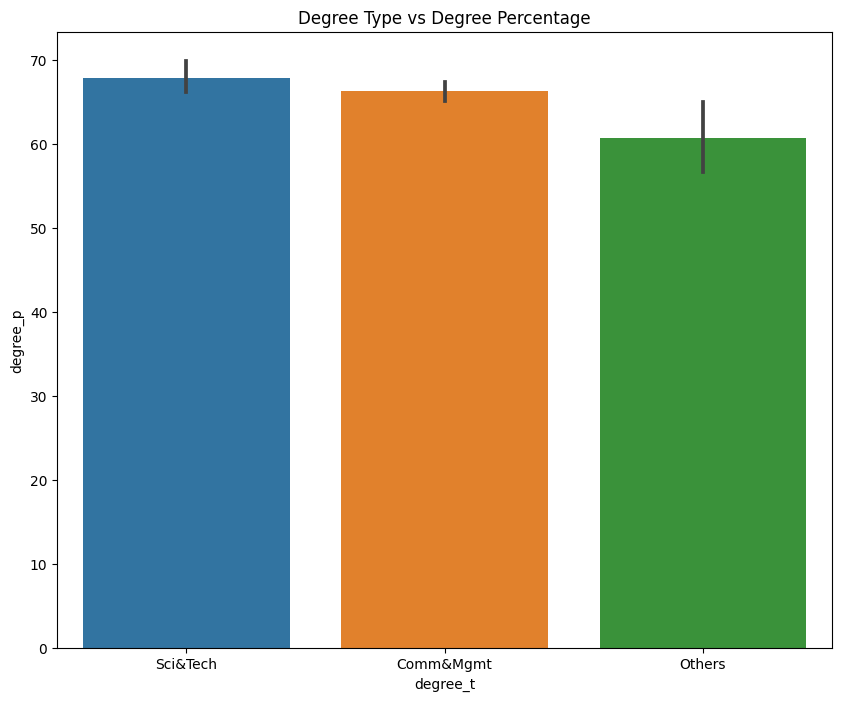

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'degree_t', y = 'degree_p', data = df)
plt.title("Degree Type vs Degree Percentage")
plt.show()

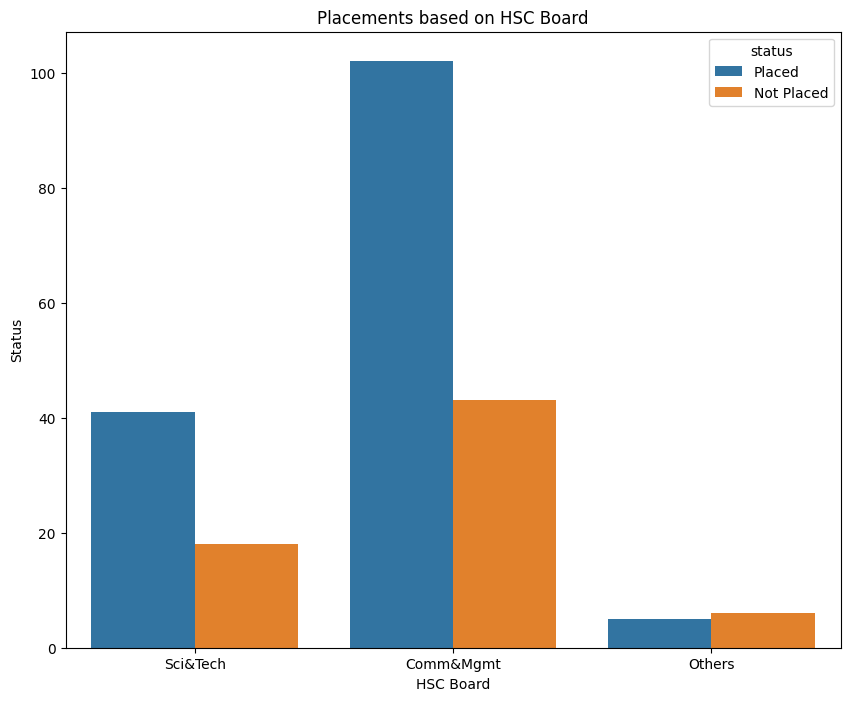

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'degree_t', hue = 'status', data = df)
plt.title("Placements based on HSC Board", fontsize = 12)
plt.xlabel("HSC Board", fontsize = 10)
plt.ylabel("Status", fontsize = 10)
plt.show()

### Observations:-
 - The chances of placements for commerce and managements degree student is more follow by the science and technology students.

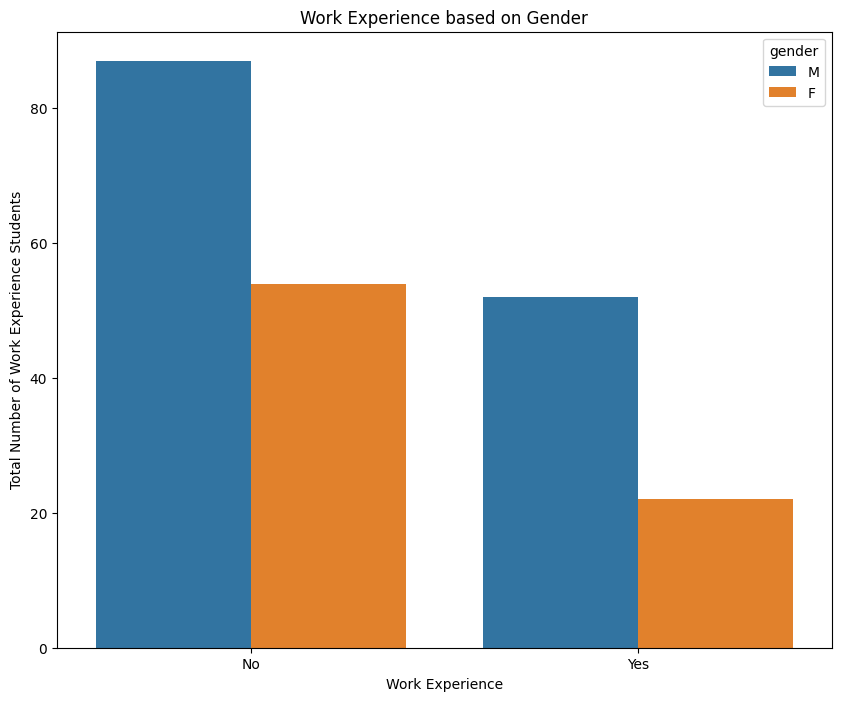

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'workex', hue = 'gender', data = df)
plt.title("Work Experience based on Gender", fontsize = 12)
plt.xlabel("Work Experience", fontsize = 10)
plt.ylabel("Total Number of Work Experience Students", fontsize = 10)
plt.show()

### Observations:- 
 - From the above plot we can say that about approximately 52 male students and 22 female students has work experience.

In [ ]:
df.groupby(['workex'])['gender'].value_counts()

workex  gender
No      M         87
        F         54
Yes     M         52
        F         22
Name: gender, dtype: int64

In [ ]:
df.groupby(['workex'])['status'].value_counts()

workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: status, dtype: int64

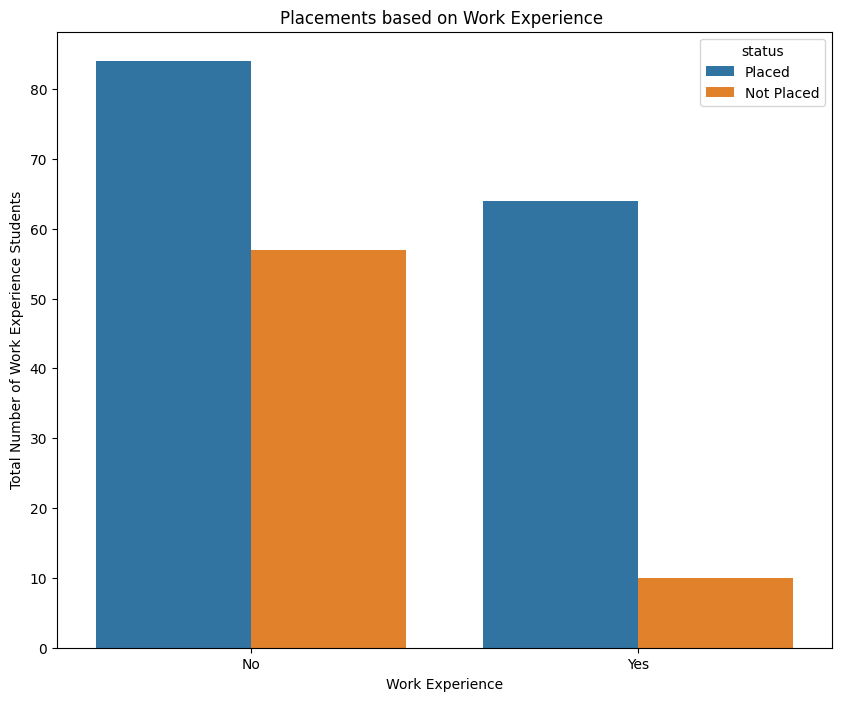

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'workex', hue = 'status', data = df)
plt.title("Placements based on Work Experience ", fontsize = 12)
plt.xlabel("Work Experience", fontsize = 10)
plt.ylabel("Total Number of Work Experience Students", fontsize = 10)
plt.show()

- Here we can say that count of placements for students with no work experience is more that students with work experience.

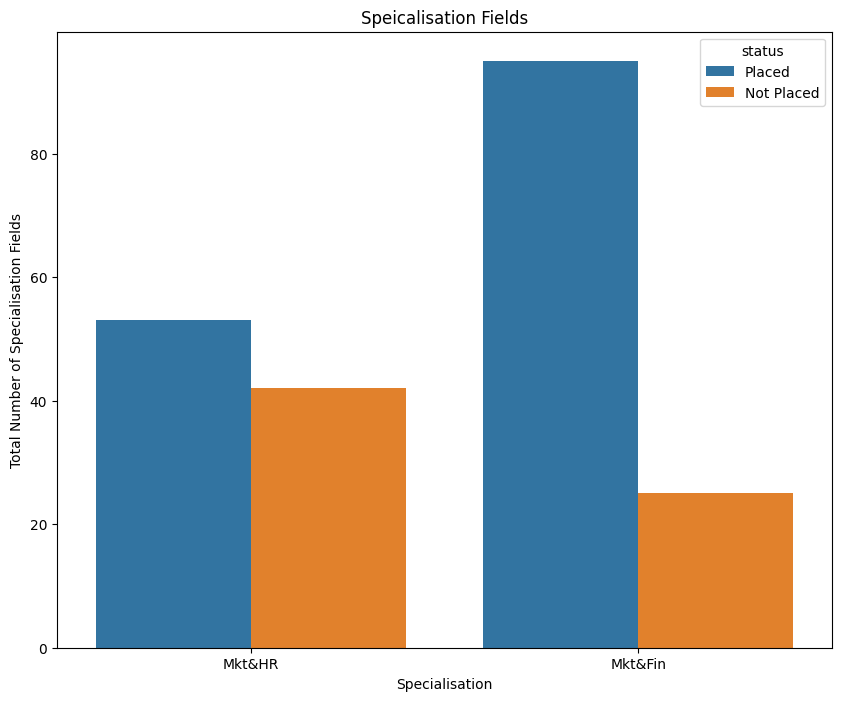

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x= 'specialisation', hue = 'status', data = df)
plt.title("Speicalisation Fields", fontsize = 12)
plt.xlabel("Specialisation", fontsize = 10)
plt.ylabel("Total Number of Specialisation Fields", fontsize = 10)
plt.show()

### Observations:-
 - The chances of placements for Mkt&Fin students is more as compared to the Mkt&HR students.

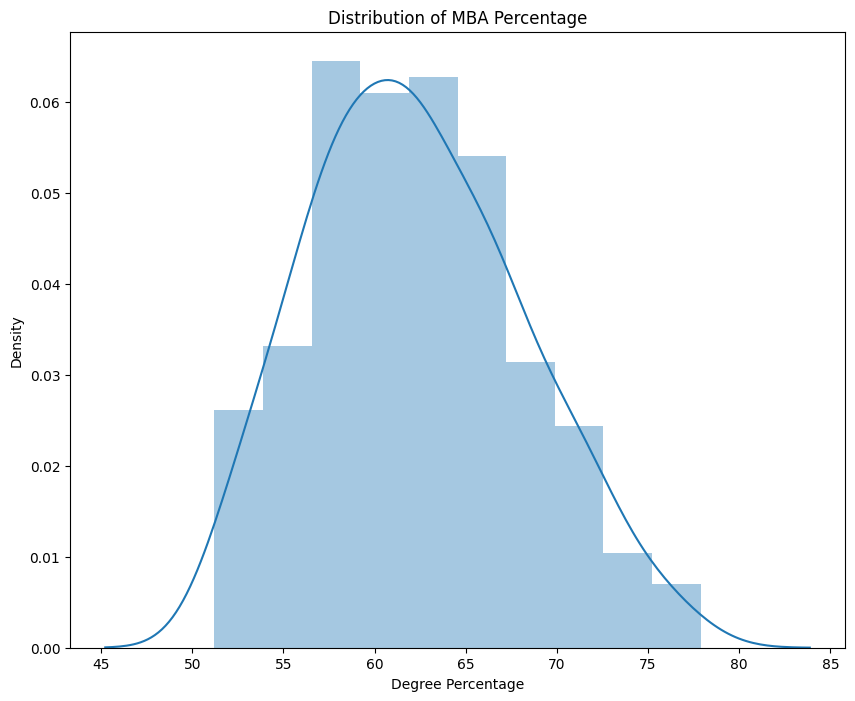

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df['mba_p'])
plt.xlabel("Degree Percentage")
plt.title("Distribution of MBA Percentage", fontsize = 12)
plt.show()

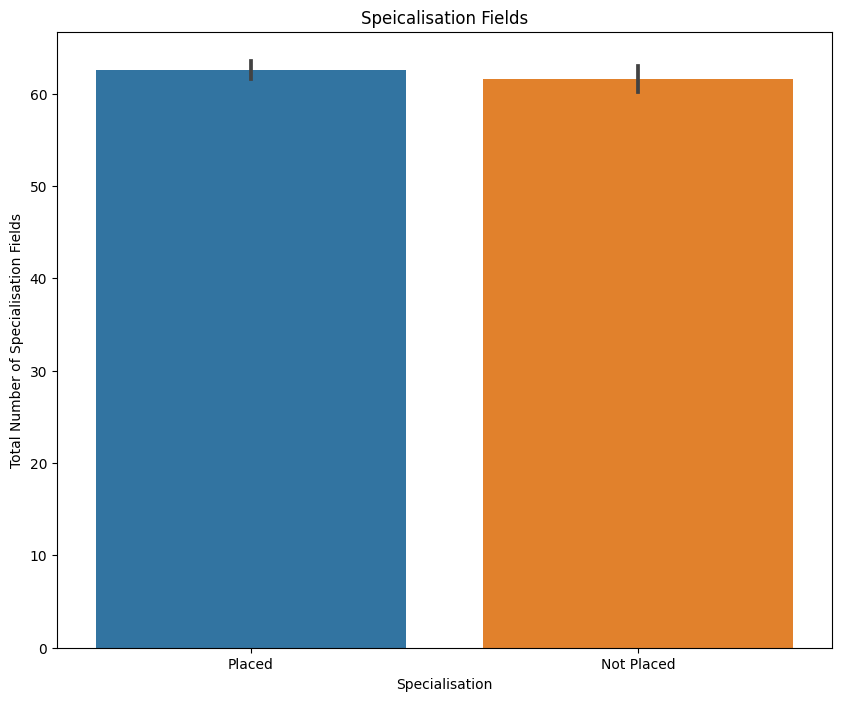

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(y= 'mba_p', x = 'status', data = df)
plt.title("Speicalisation Fields", fontsize = 12)
plt.xlabel("Specialisation", fontsize = 10)
plt.ylabel("Total Number of Specialisation Fields", fontsize = 10)
plt.show()

### Observations:-  
 - Here we can say that getting good percentage in MBA degree does not gurantee placements of students.

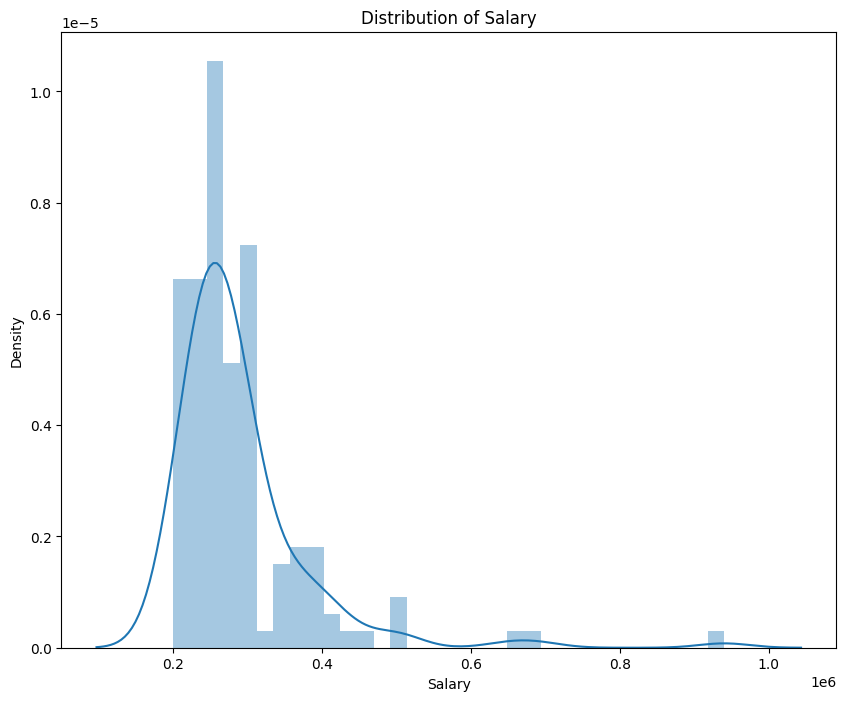

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df['salary'])
plt.xlabel("Salary")
plt.title("Distribution of Salary", fontsize = 12)
plt.show()

 - The distribution of salary feature is right skewed.
 - Here we can say that the most of the students getting package between 200k-400k and most salaries above 400k are outliers.

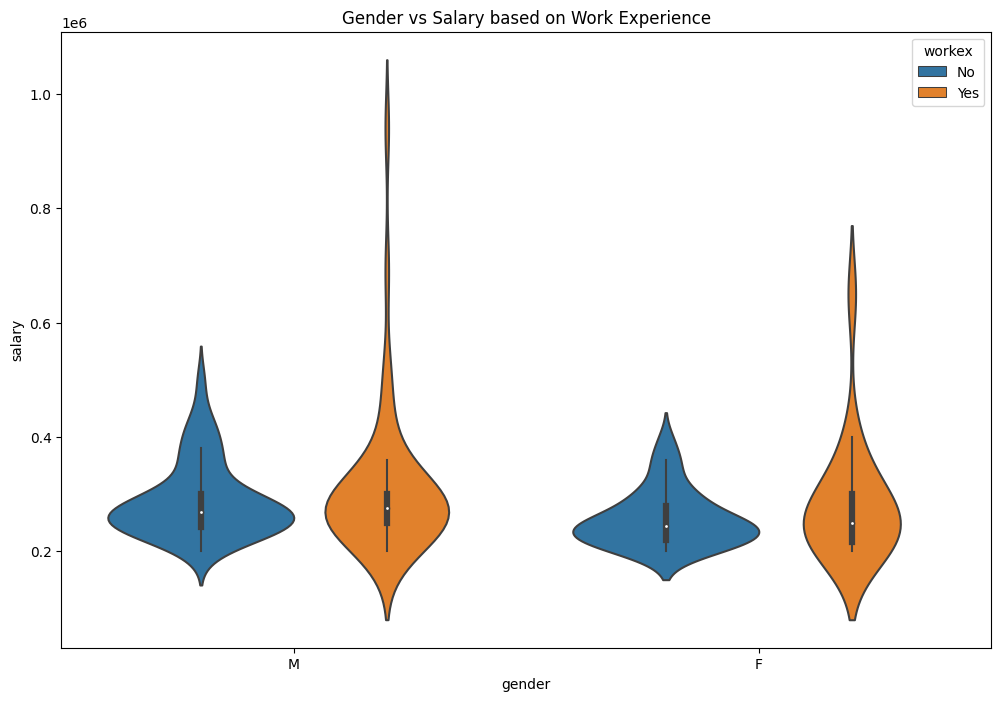

In [ ]:
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'gender', y='salary', hue= 'workex', data = df)
plt.title("Gender vs Salary based on Work Experience", fontsize = 12)
plt.show()

### Observations:- 
 - Here clearly we can say that students with work experience getting more salary.
 - The The maximum salary in male candidates with experience is >1M and for female it is ~700k. The maximum salary in male candidates without experience is ~550k and for female it is ~430k. 

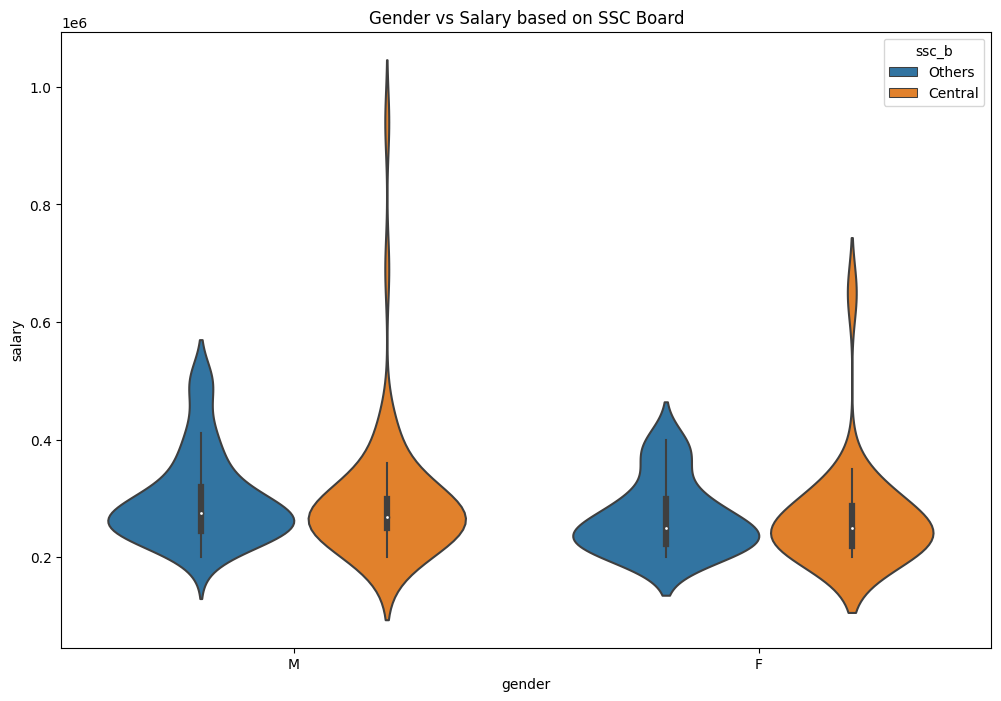

In [ ]:
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'gender', y='salary', hue= 'ssc_b', data = df)
plt.title("Gender vs Salary based on SSC Board", fontsize = 12)
plt.show()

 - Here we can say that both male and female students from the central board got higher packages as compared to the other boards students.

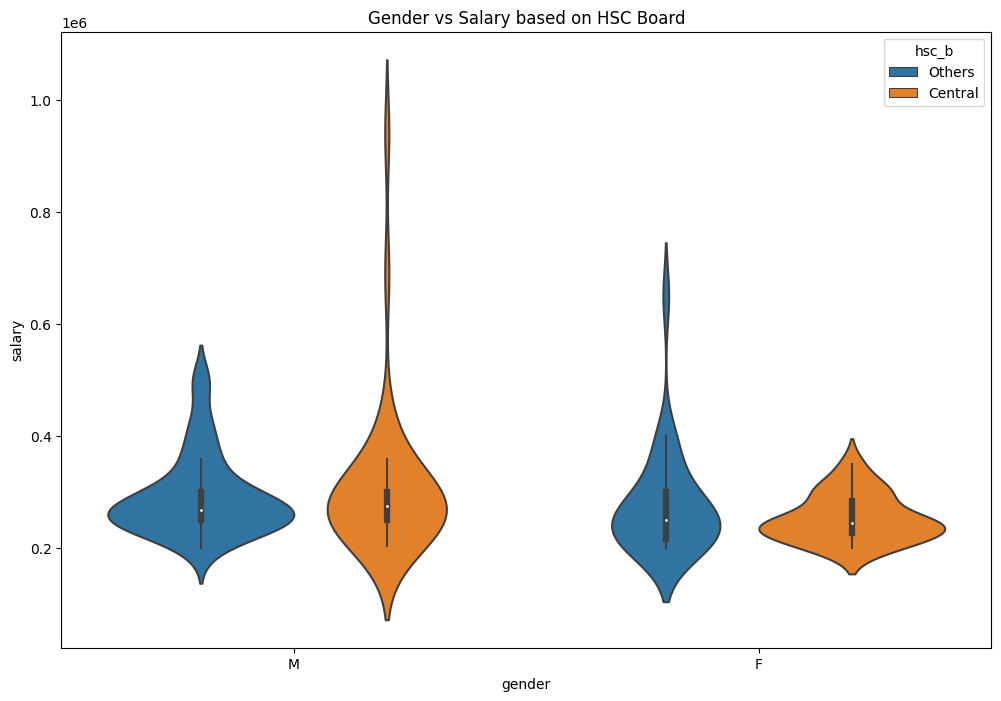

In [ ]:
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'gender', y='salary', hue= 'hsc_b', data = df)
plt.title("Gender vs Salary based on HSC Board", fontsize = 12)
plt.show()

 - From the above plot we can say that, male students from the central board got the higher packages as compared to the other board students. 
 - But in case of female students from the both central and other boards got less packages.

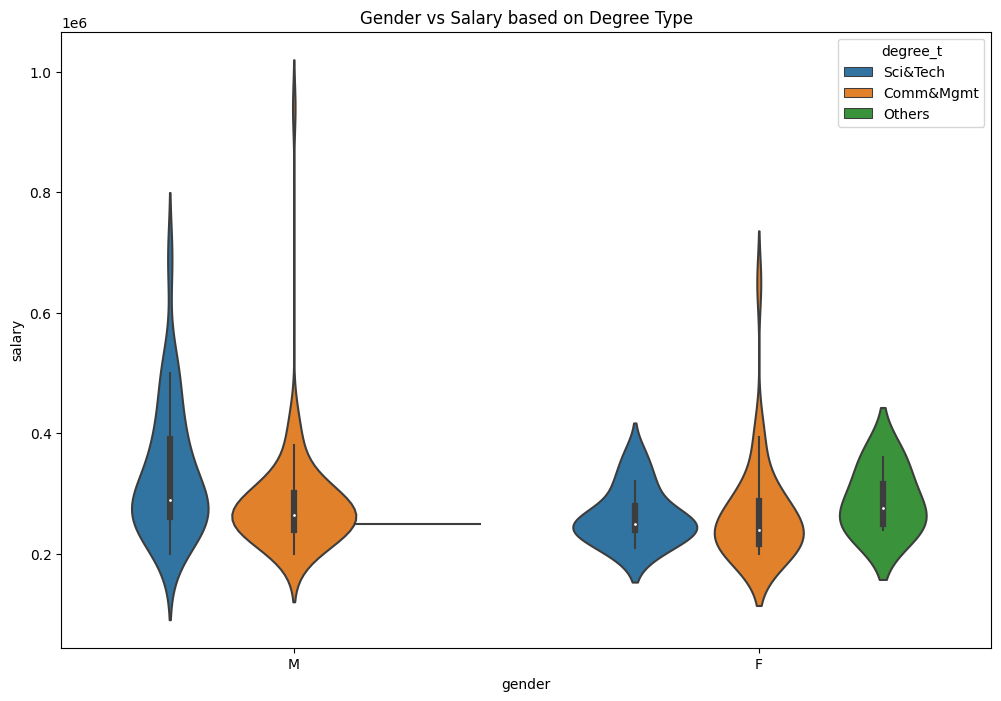

In [ ]:
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'gender', y='salary', hue= 'degree_t', data = df)
plt.title("Gender vs Salary based on Degree Type", fontsize = 12)
plt.show()

### Observations:-
 - Based on the Comm&Mgmt branch, both male and female students got the high package.
 - In case of Sci&Tech branch, male student got the higher packages as compared to the female students.
 - None of the male student got placed the from other branch whereas for female students the package is close to the package got for female students from Sci&Tehc branch.